# Introduction

Notebook to analyze the **False Positive** Results for each model in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import similarity_measures as sm

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [2]:
models_runner_4 = Feat_BR_Models_Runner()
lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

oracle = fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T

evaluator_4 = m_eval.ModelEvaluator(oracle)
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4],
                                       top_values=[1,3,5], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Feat_BR Volunteers Matrix shape: (91, 19)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Load Datasets

In [3]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


### Results

In [4]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.0,1.0,Bug_Number 1248267 1248268 125...
1,lsi,top_1_cosine_0.1,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.1,1.0,Bug_Number 1248267 1248268 125...
2,lsi,top_1_cosine_0.2,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.2,1.0,Bug_Number 1248267 1248268 125...
3,lsi,top_1_cosine_0.3,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.3,1.0,Bug_Number 1248267 1248268 125...
4,lsi,top_1_cosine_0.4,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.4,1.0,Bug_Number 1248267 1248268 125...


### Grouping Results by Model

### Min Precision

model
bm25          11.65
lda            3.66
lsi           12.53
wordvector     9.67
Name: perc_precision, dtype: float64



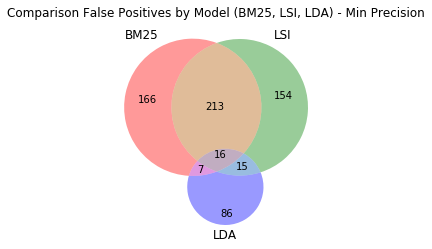

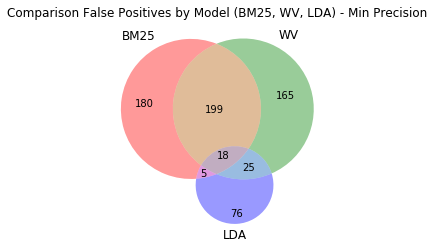

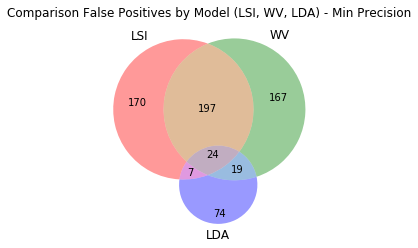

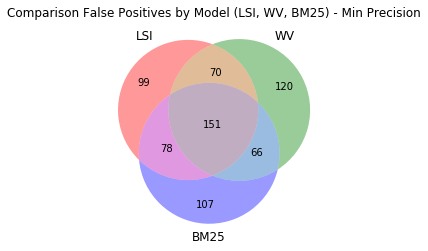

In [5]:
group = evals_df_4.groupby('model').perc_precision.min()
print(group)
print()

bm25_min_prec = group[group.index == 'bm25'].values[0]
lsi_min_prec = group[group.index == 'lsi'].values[0]
lda_min_prec = group[group.index == 'lda'].values[0]
wv_min_prec = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_min_prec))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_min_prec))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_min_prec))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_min_prec))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Min Precision')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (BM25, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [6]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set)

BM25 Exclusive TP:


{('apz_async_scrolling', 1248268),
 ('apz_async_scrolling', 1257087),
 ('apz_async_scrolling', 1270274),
 ('apz_async_scrolling', 1271607),
 ('apz_async_scrolling', 1276120),
 ('apz_async_scrolling', 1279143),
 ('apz_async_scrolling', 1285328),
 ('apz_async_scrolling', 1287823),
 ('apz_async_scrolling', 1292566),
 ('apz_async_scrolling', 1294733),
 ('apz_async_scrolling', 1296322),
 ('apz_async_scrolling', 1296861),
 ('apz_async_scrolling', 1297336),
 ('apz_async_scrolling', 1297374),
 ('apz_async_scrolling', 1305676),
 ('apz_async_scrolling', 1305737),
 ('apz_async_scrolling', 1309856),
 ('apz_async_scrolling', 1312018),
 ('apz_async_scrolling', 1353831),
 ('apz_async_scrolling', 1357458),
 ('apz_async_scrolling', 1365887),
 ('context_menu', 1264988),
 ('context_menu', 1267480),
 ('context_menu', 1279140),
 ('context_menu', 1281190),
 ('context_menu', 1283542),
 ('context_menu', 1287384),
 ('context_menu', 1287687),
 ('context_menu', 1287748),
 ('context_menu', 1291770),
 ('context_me



LSI Exclusive TP:


{('apz_async_scrolling', 1287384),
 ('apz_async_scrolling', 1294887),
 ('browser_customization', 1264988),
 ('browser_customization', 1282759),
 ('browser_customization', 1285328),
 ('browser_customization', 1291770),
 ('browser_customization', 1305195),
 ('browser_customization', 1335538),
 ('browser_customization', 1352539),
 ('browser_customization', 1365887),
 ('browser_customization', 1430603),
 ('context_menu', 1285041),
 ('context_menu', 1319119),
 ('downloads_dropmaker', 1301056),
 ('downloads_dropmaker', 1305737),
 ('flac_support', 1279864),
 ('flash_support', 1287748),
 ('flash_support', 1292573),
 ('flash_support', 1335992),
 ('flash_support', 1337682),
 ('indicator_device_perm', 1292566),
 ('pdf_viewer', 1282759),
 ('pdf_viewer', 1305195),
 ('pdf_viewer', 1432915),
 ('pointer_lock_api', 1297976),
 ('pointer_lock_api', 1299458),
 ('pointer_lock_api', 1344446),
 ('tts_in_desktop', 1267501),
 ('tts_in_desktop', 1285041),
 ('tts_in_desktop', 1289240),
 ('tts_in_desktop', 129473



LDA Exclusive TP:


{('browser_customization', 1269348),
 ('browser_customization', 1279864),
 ('browser_customization', 1294733),
 ('browser_customization', 1294887),
 ('browser_customization', 1296366),
 ('browser_customization', 1297336),
 ('browser_customization', 1297976),
 ('browser_customization', 1306639),
 ('browser_customization', 1312018),
 ('browser_customization', 1316126),
 ('browser_customization', 1334844),
 ('browser_customization', 1337682),
 ('browser_customization', 1343256),
 ('browser_customization', 1345687),
 ('downloads_dropmaker', 1319119),
 ('indicator_device_perm', 1271607),
 ('indicator_device_perm', 1279864),
 ('indicator_device_perm', 1289240),
 ('indicator_device_perm', 1293308),
 ('indicator_device_perm', 1294733),
 ('indicator_device_perm', 1296366),
 ('indicator_device_perm', 1297374),
 ('indicator_device_perm', 1297686),
 ('indicator_device_perm', 1300738),
 ('indicator_device_perm', 1306639),
 ('indicator_device_perm', 1309856),
 ('indicator_device_perm', 1311998),
 ('



WV Exclusive TP:


{('apz_async_scrolling', 1282759),
 ('apz_async_scrolling', 1305195),
 ('apz_async_scrolling', 1345687),
 ('apz_async_scrolling', 1352539),
 ('browser_customization', 1277937),
 ('browser_customization', 1279143),
 ('browser_customization', 1287384),
 ('browser_customization', 1295502),
 ('browser_customization', 1299458),
 ('browser_customization', 1305676),
 ('downloads_dropmaker', 1270274),
 ('downloads_dropmaker', 1270983),
 ('downloads_dropmaker', 1278388),
 ('downloads_dropmaker', 1283542),
 ('downloads_dropmaker', 1291770),
 ('downloads_dropmaker', 1294887),
 ('downloads_dropmaker', 1296861),
 ('downloads_dropmaker', 1297336),
 ('downloads_dropmaker', 1328913),
 ('downloads_dropmaker', 1330745),
 ('flash_support', 1279864),
 ('flash_support', 1301784),
 ('flash_support', 1305195),
 ('flash_support', 1309856),
 ('flash_support', 1313778),
 ('flash_support', 1319433),
 ('flash_support', 1334844),
 ('flash_support', 1336227),
 ('flash_support', 1345687),
 ('indicator_device_perm', 

In [7]:
print("LSI FP Amount: {}".format(len(lsi_fp_set)))
print("LDA FP Amount: {}".format(len(lda_fp_set)))
print("BM25 FP Amount: {}".format(len(bm25_fp_set)))
print("WV FP Amount: {}".format(len(wv_fp_set)))

LSI FP Amount: 398
LDA FP Amount: 124
BM25 FP Amount: 402
WV FP Amount: 407


#### Min Recall

model
bm25          23.43
lda            5.49
lsi           13.32
wordvector    10.44
Name: perc_recall, dtype: float64



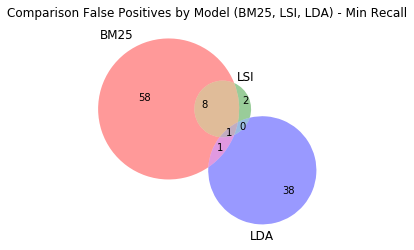

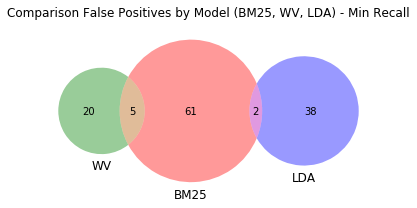

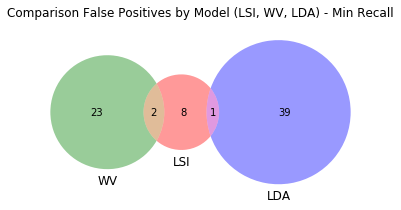

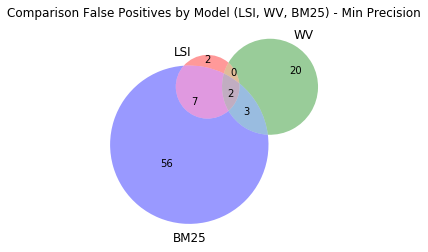

In [8]:
group = evals_df_4.groupby('model').perc_recall.min()
print(group)
print()

bm25_min_recall = group[group.index == 'bm25'].values[0]
lsi_min_recall = group[group.index == 'lsi'].values[0]
lda_min_recall = group[group.index == 'lda'].values[0]
wv_min_recall = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_min_recall))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_min_recall))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_min_recall))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_min_recall))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Min Recall')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (BM25, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [9]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set)

BM25 Exclusive FP:


{('apz_async_scrolling', 1270274),
 ('apz_async_scrolling', 1279140),
 ('apz_async_scrolling', 1305676),
 ('context_menu', 1248268),
 ('context_menu', 1271607),
 ('context_menu', 1279143),
 ('context_menu', 1285328),
 ('context_menu', 1287823),
 ('context_menu', 1294733),
 ('context_menu', 1296322),
 ('context_menu', 1296366),
 ('context_menu', 1297374),
 ('context_menu', 1301056),
 ('context_menu', 1301421),
 ('context_menu', 1305737),
 ('context_menu', 1312018),
 ('context_menu', 1313778),
 ('context_menu', 1314643),
 ('context_menu', 1318903),
 ('context_menu', 1323211),
 ('context_menu', 1343256),
 ('context_menu', 1353831),
 ('context_menu', 1430603),
 ('flash_support', 1283542),
 ('flash_support', 1319119),
 ('flash_support', 1328913),
 ('indicator_device_perm', 1267480),
 ('indicator_device_perm', 1278388),
 ('indicator_device_perm', 1303339),
 ('indicator_device_perm', 1408361),
 ('new_awesome_bar', 1257087),
 ('new_awesome_bar', 1277937),
 ('new_awesome_bar', 1281190),
 ('new_



LSI Exclusive FP:


{('indicator_device_perm', 1281190), ('new_awesome_bar', 1312018)}



LDA Exclusive FP:


{('browser_customization', 1257087),
 ('browser_customization', 1267480),
 ('browser_customization', 1269348),
 ('browser_customization', 1270274),
 ('browser_customization', 1270983),
 ('browser_customization', 1271607),
 ('browser_customization', 1276120),
 ('browser_customization', 1278388),
 ('browser_customization', 1279864),
 ('browser_customization', 1281190),
 ('browser_customization', 1283542),
 ('browser_customization', 1289240),
 ('browser_customization', 1293308),
 ('browser_customization', 1294733),
 ('browser_customization', 1294887),
 ('browser_customization', 1296366),
 ('browser_customization', 1297336),
 ('browser_customization', 1297374),
 ('browser_customization', 1297686),
 ('browser_customization', 1297976),
 ('browser_customization', 1300738),
 ('browser_customization', 1303339),
 ('browser_customization', 1306639),
 ('browser_customization', 1309856),
 ('browser_customization', 1311998),
 ('browser_customization', 1312018),
 ('browser_customization', 1314643),
 



WV Exclusive FP:


{('context_menu', 1292566),
 ('indicator_device_perm', 1279143),
 ('new_awesome_bar', 1248267),
 ('new_awesome_bar', 1248268),
 ('new_awesome_bar', 1267501),
 ('new_awesome_bar', 1269485),
 ('new_awesome_bar', 1289832),
 ('new_awesome_bar', 1314643),
 ('new_awesome_bar', 1319433),
 ('new_awesome_bar', 1320557),
 ('new_awesome_bar', 1330745),
 ('new_awesome_bar', 1343256),
 ('new_awesome_bar', 1345687),
 ('new_awesome_bar', 1449700),
 ('pointer_lock_api', 1292573),
 ('w10_comp', 1271607),
 ('w10_comp', 1301056),
 ('w10_comp', 1318903),
 ('windows_child_mode', 1297686),
 ('windows_child_mode', 1336227)}

#### Max Precision

model
bm25          25.27
lda           14.29
lsi           31.32
wordvector    28.57
Name: perc_precision, dtype: float64



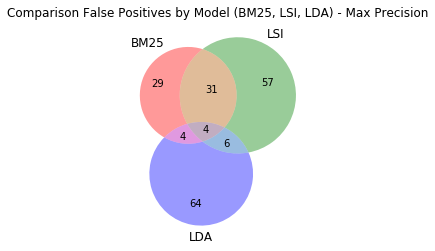

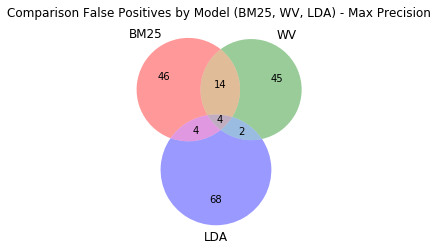

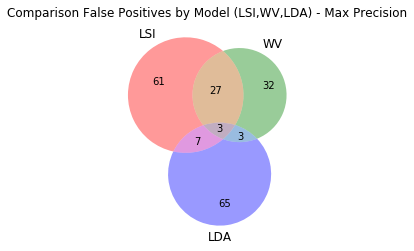

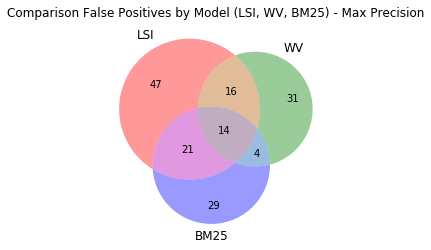

In [10]:
group = evals_df_4.groupby('model').perc_precision.max()
print(group)
print()

bm25_max_prec = group[group.index == 'bm25'].values[0]
lsi_max_prec = group[group.index == 'lsi'].values[0]
lda_max_prec = group[group.index == 'lda'].values[0]
wv_max_prec = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_max_prec))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_max_prec))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_max_prec))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_max_prec))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Max Precision')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (BM25, WV, LDA) - Max Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI,WV,LDA) - Max Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Max Precision')
plt.show()

##### Exclusive Cases

In [11]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_f p_set)

SyntaxError: invalid syntax (<ipython-input-11-23fcd41bd5a1>, line 11)

In [ ]:
print("LSI FP Amount: {}".format(len(lsi_fp_set)))
print("LDA FP Amount: {}".format(len(lda_fp_set)))
print("BM25 FP Amount: {}".format(len(bm25_fp_set)))
print("WV FP Amount: {}".format(len(wv_fp_set)))

#### Max Recall

In [ ]:
group = evals_df_4.groupby('model').perc_recall.max()
print(group)
print()

bm25_max_recall = group[group.index == 'bm25'].values[0]
lsi_max_recall = group[group.index == 'lsi'].values[0]
lda_max_recall = group[group.index == 'lda'].values[0]
wv_max_recall = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_max_recall))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_max_recall))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_max_recall))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_max_recall))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Max Recall')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (Bm25, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Max Recall')
plt.show()

##### Exclusive Cases

In [ ]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set)

In [ ]:
print("LSI FP Amount: {}".format(len(lsi_fp_set)))
print("LDA FP Amount: {}".format(len(lda_fp_set)))
print("BM25 FP Amount: {}".format(len(bm25_fp_set)))
print("WV FP Amount: {}".format(len(wv_fp_set)))